# Decsion Tree Regression

In [68]:
from warnings import filterwarnings
filterwarnings('ignore')

## Reading a Dataset

In [69]:
import pandas as pd

df1 = pd.read_csv("50_Startups.csv")
df1

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [70]:
df1.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [72]:
df1.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

## Presprocessing

In [73]:
# Separate X and Y

X = df1.drop(labels=['PROFIT'], axis = 1)
Y = df1[['PROFIT']]

In [74]:
X.head()

,RND,ADMIN,MKT,STATE
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [75]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## Numerical Pipeline

1. con: Simple Imputer(Mean, Median), Standard Scaler
2. cat: Simple Imputer(Most Frequent), One Hot Encoder

In [76]:
cat = list(X.columns[X.dtypes == 'object'])
con = list(X.columns[X.dtypes != 'object'])

In [77]:
cat

['STATE']

In [78]:
con

['RND', 'ADMIN', 'MKT']

## Pipeline

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [80]:
num_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())])

cat_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore'))])

pre = ColumnTransformer([('con', num_pipe, con),
                         ('cat', cat_pipe, cat)])

In [81]:
X_pre = pre.fit_transform(X)
X_pre

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.03036886e+00,  9.86952101e-01,  8.308

In [82]:
cols = pre.get_feature_names_out()
cols

array(['con__RND', 'con__ADMIN', 'con__MKT', 'cat__STATE_California',
       'cat__STATE_Florida', 'cat__STATE_New York'], dtype=object)

In [83]:
X_pre = pd.DataFrame(X_pre, columns = cols)
X_pre.head()

,con__RND,con__ADMIN,con__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
0,2.016411,0.560753,2.153943,0.0,0.0,1.0
1,1.955860,1.082807,1.923600,1.0,0.0,0.0
2,1.754364,-0.728257,1.626528,0.0,1.0,0.0
3,1.554784,-0.096365,1.422210,0.0,0.0,1.0
4,1.504937,-1.079919,1.281528,0.0,1.0,0.0


## Train Test Split

In [84]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size= 0.2, random_state = 21)

In [85]:
xtrain.shape

(40, 6)

In [86]:
xtest.shape

(10, 6)

### Creating Decision Tree Regression Model

In [87]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [88]:
# training R2

dtr.score(xtrain, ytrain)

1.0

In [89]:
# testing R2

dtr.score(xtest, ytest)

0.9279800829275814

### Tuning the model

In [90]:
params = {'max_depth': [2,3,4,5,6,7,8, 9, 10],
          'criterion': ['squared_error', 'absolute_error']}

In [91]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeRegressor(random_state=42)
gscv = GridSearchCV(model,param_grid=params,cv=5,scoring='neg_mean_squared_error')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='neg_mean_squared_error')

In [92]:
gscv.best_params_

{'criterion': 'absolute_error', 'max_depth': 5}

In [93]:
gscv.best_score_

-252871442.10242313

In [94]:
best_dtr = gscv.best_estimator_
best_dtr

DecisionTreeRegressor(criterion='absolute_error', max_depth=5, random_state=42)

## Evaluate R2 in Training and Testing

In [95]:
best_dtr.score(xtrain, ytrain)

0.9973127070752787

In [96]:
best_dtr.score(xtest, ytest)

0.8783765460868838

### Plotting the base decision model tree

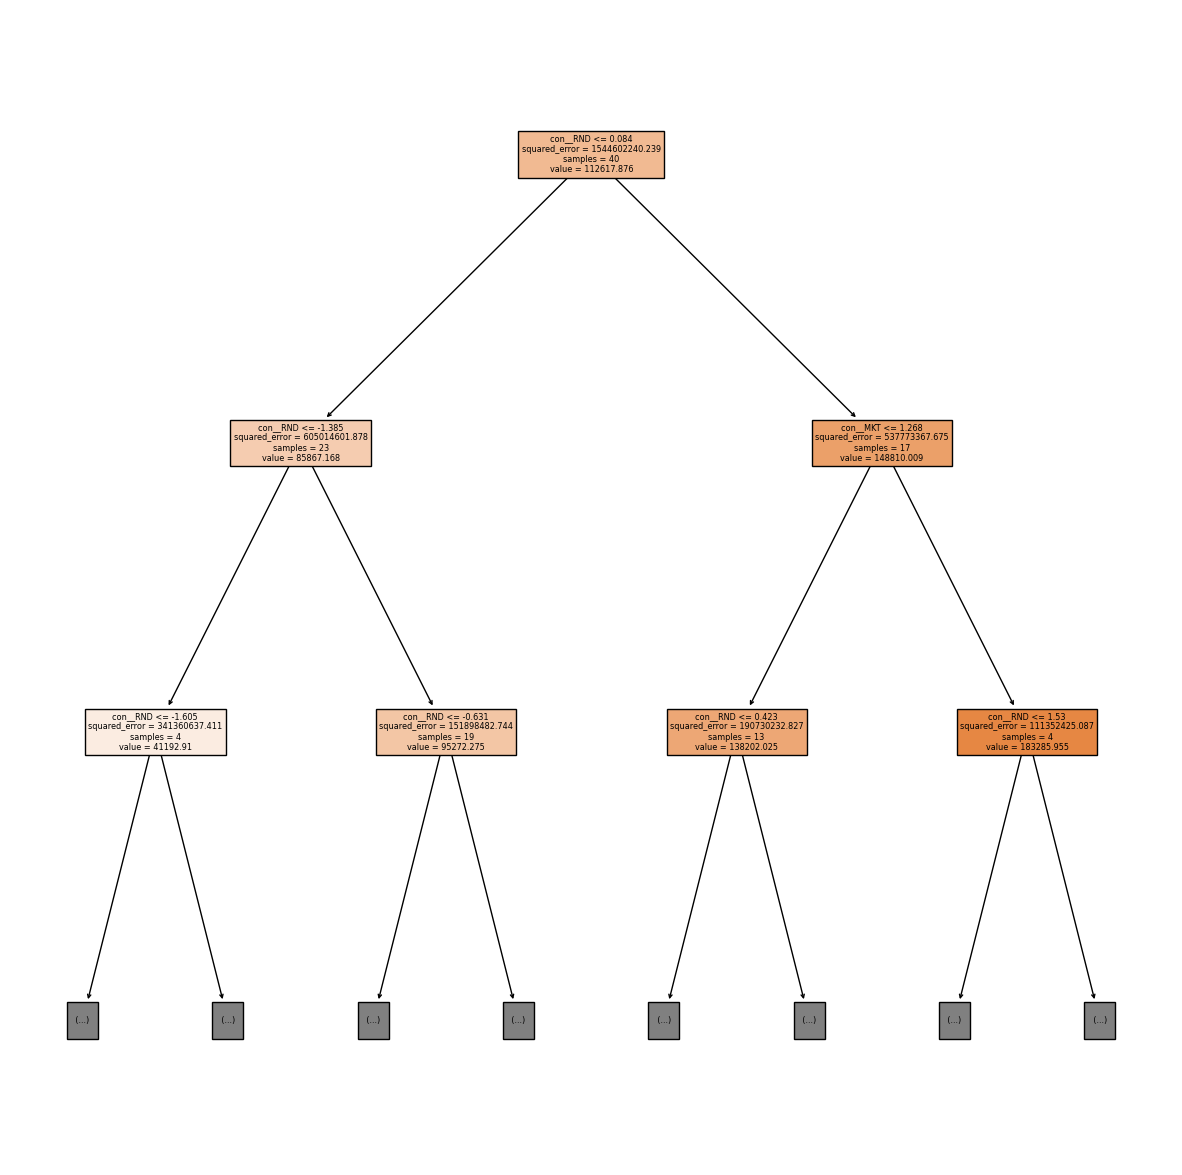

In [97]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plot_tree(dtr, filled=True, feature_names=list(xtrain.columns), max_depth=2)
plt.show()

### Feature Importances

In [98]:
imp = dtr.feature_importances_
imp

array([8.80646583e-01, 3.26648955e-03, 1.08504567e-01, 1.58617393e-03,
       3.53800990e-08, 5.99615130e-03])

In [99]:
imp = pd.Series(imp)
imp.index = xtrain.columns
imp

con__RND                 8.806466e-01
con__ADMIN               3.266490e-03
con__MKT                 1.085046e-01
cat__STATE_California    1.586174e-03
cat__STATE_Florida       3.538010e-08
cat__STATE_New York      5.996151e-03
dtype: float64

In [100]:
imp = imp.sort_values(ascending=False)
imp

con__RND                 8.806466e-01
con__MKT                 1.085046e-01
cat__STATE_New York      5.996151e-03
con__ADMIN               3.266490e-03
cat__STATE_California    1.586174e-03
cat__STATE_Florida       3.538010e-08
dtype: float64

<Axes: title={'center': 'feature_Importance'}>

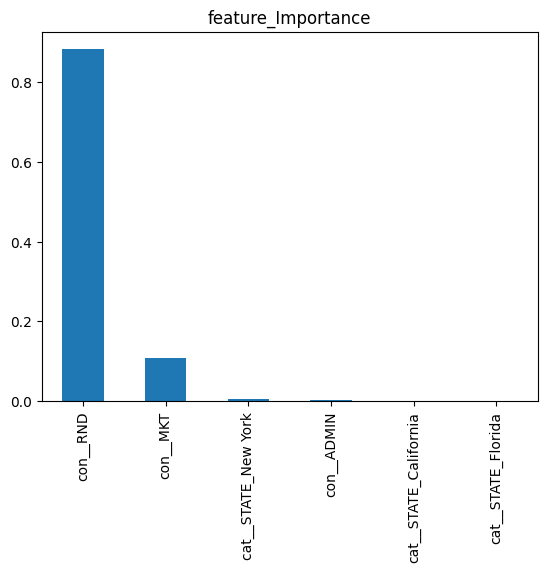

In [101]:
imp.plot(kind = "bar", title = 'feature_Importance')

In [102]:
df1_pre = X_pre.join(Y)

In [104]:
df1_pre[df1_pre['con__RND']<=0.084].mean()

con__RND                    -0.692463
con__ADMIN                  -0.166211
con__MKT                    -0.488150
cat__STATE_California        0.379310
cat__STATE_Florida           0.310345
cat__STATE_New York          0.310345
PROFIT                   85037.441379
dtype: float64

###

1. Feature Selecion : Ordinal Encoder
2. Final Model : One Hot Encoder

### MSE, MAE, RMSE

In [ ]:
ypred_tr = dtr.predict(xtrain)
ypred_ts = dtr.predict(xtest)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(ypred_ts, ytest)
mse

119167773.95473006

In [ ]:
rmse = mse**(1/2)
rmse

10916.399312718919

In [ ]:
mae = mean_absolute_error(ypred_ts, ytest)
mae

7948.6089999999995

In [ ]:
r2 = r2_score(ytest, ypred_ts)
r2

0.9328536502731732

In [105]:
df1_pre.to_csv("pre.csv")